<a href="https://colab.research.google.com/github/korede97/Hamoye_ML_Externship/blob/main/005_Weekly_ML_CodeClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = '15px' font color='navy'>The Complete Machine Learning Externship:</font> 

<font size = '6px' font color='red'>Weekly ML Code Club: 005</font> 

<font size  = 5 font color = 'blue'>Machine Learning Neural Network <font/>



# Neural Network

Familiarizing ourselves with building a simple neural network
classifier on tensorflow using keras

We would be working with the fashion_mnist dataset provided by tensorflow. The dataset comprises images of the following given as an array of numbers ranging from 0 to 255 which represent pixel values.
* T-shirt/tops - 0
* Trousers - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

The numbers in front of the image represent their labels(encoding), these labels are what we would be classifying. So to know what image belongs to what label we have to create a mapping of the labels to their respective images.

# Load the Dataset

In [393]:
# make sure tensorflow 2.0 is installed
# pip install "tensorflow>=2.0.0"

In [394]:
# Import all necessary libraries 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# print(tf.__version__)
data = keras.datasets.fashion_mnist

Load the dataset from the tensorflow website and store the train and train images along with their labels (1 through 9) as a tuple

In [395]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

### Task 1: Explore and understand the dataset

In [396]:
print("Training data: {}, {}".format(train_images.shape, train_labels.shape))
# prints Training data: (60000, 28, 28), (60000,)
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))
# prints Test data: (10000, 28, 28), (10000,)
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))

Training data: (60000, 28, 28), (60000,)
Test data: (10000, 28, 28), (10000,)
There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


In [397]:
# first train_label from the data 
print(train_labels[0])


9


It outputs an integer value ranging from 0 to 9 which represents an image as listed above

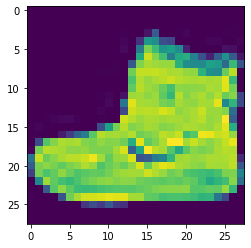

In [398]:
# visualize the image belonging to the output label 
plt.imshow(train_images[0])

Outputs the image that is represented by label 0

In [399]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

The train images are an array of 28 * 28 pixels

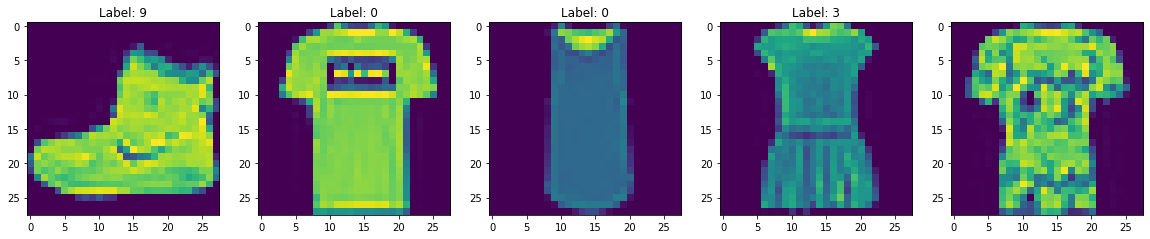

In [400]:
plt.figure(figsize=(20, 5))

plt.subplot(1,5,1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))

plt.subplot(1,5,2)
plt.imshow(train_images[1])
plt.title("Label: {}".format(train_labels[1]))

plt.subplot(1,5,3)
plt.imshow(train_images[2])
plt.title("Label: {}".format(train_labels[2]))

plt.subplot(1,5,4)
plt.imshow(train_images[3])
plt.title("Label: {}".format(train_labels[3]))

plt.subplot(1,5,5)
plt.imshow(test_images[400])


plt.show()

In [401]:
class_names  = ['T-shirt/tops','Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
                'Sneaker', 'Bag', 'Ankle boot']

In [402]:
print(class_names[train_labels[0]])

Ankle boot


### Task 2: Prepare the dataset for modelling

In [403]:
# scale the train and test images to range between 0 and 1 by dividing the array by 255 (where pixel values range from 0 - 255 )
train_images = (train_images/255.0)
test_images = (test_images/255.0)

In [404]:
# Reshape the 28*28 matrix to a single array
# new_dimension = np.prod(train_images.shape[1:])
# train_images = train_images.reshape(train_images.shape[0], new_dimension)
# test_images = test_images.reshape(test_images.shape[0], new_dimension)

# print("train_images: {}".format(train_images.shape)) #prints  x_train: (50000, 784)
# print("test_images: {}".format(test_images.shape)) #prints test_images: (10000, 784)

#### Train the neural network 

In [405]:
# Set up the layers 

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten


model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_labels, activation='softmax'))

In [406]:
# compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [407]:
# Encode labels to into categorical variables 
from tensorflow.keras.utils import to_categorical
no_labels = 10
train_labels = to_categorical(train_labels, no_labels)
test_labels = to_categorical(test_labels, no_labels)

In [408]:
# Train the neural network 
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4799 - acc: 0.8264
Epoch 2/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3560 - acc: 0.8693
Epoch 3/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3212 - acc: 0.8816
Epoch 4/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2985 - acc: 0.8877
Epoch 5/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2819 - acc: 0.8937
Epoch 6/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2669 - acc: 0.8988
Epoch 7/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2543 - acc: 0.9036
Epoch 8/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2435 - acc: 0.9075
Epoch 9/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2333 - acc: 0.9116
Epoch 10/10
60000/60000 [==============================] - 

Model Evaluation

In [409]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Test loss: 0.3341808252453804
Test accuracy: 0.888700008392334


Note that the training data accuracy is a greater than that of testing data. This suggests there is some overfitting in our model

## Visualize the predicted results and compare with actual images

In [410]:
predictions = model.predict([test_images]) 
print(np.argmax(predictions[3723]))
print(class_names[np.argmax(predictions[3723])])
print(predictions.shape)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


9
Ankle boot
(10000, 10)


In [411]:
import random
#Generate 10 random numbers between 0 and 60000
randomlist = random.sample(range(0, len(test_images)), 10)
print(randomlist)

[4788, 4801, 8321, 7558, 614, 9062, 1812, 8276, 1972, 8874]


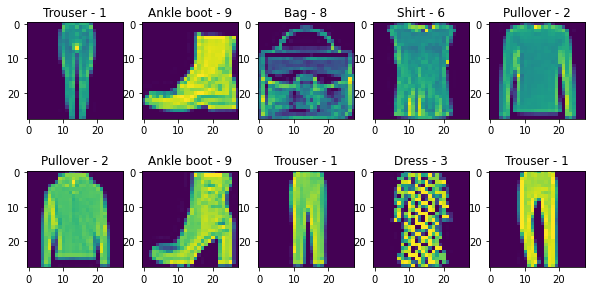

In [413]:
n_row = 2
n_col = 5
c = 1
# num_images = 10

plt.figure(figsize=(10, 5))

for i in randomlist:
  pred_label = np.argmax(predictions[i])
  title = class_names[pred_label] + " - " + str(pred_label)
  plt.subplot(n_row,n_col,c)
  plt.imshow(test_images[i].reshape(28,28)) 
  plt.title(title)
  c=c+1
plt.show() 

The model correctly identifies most images. Further, we can look into the probabilities of these predictions.